In [1]:
library(olsrr)
library(bootstrap)
library(Rmisc)


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers


Loading required package: lattice

Loading required package: plyr



In [2]:
original_dataset <- read.csv("Dataset.txt", header = T, sep = "")
attach(original_dataset)


Call:
lm(formula = Orders ~ PrintRuns)

Residuals:
    Min      1Q  Median      3Q     Max 
-892.50 -208.11  -29.97  193.39 1558.01 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -212.6631   258.8641  -0.822 0.416755    
PrintRuns      0.4903     0.1222   4.012 0.000291 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 570.1 on 36 degrees of freedom
Multiple R-squared:  0.3089,	Adjusted R-squared:  0.2897 
F-statistic: 16.09 on 1 and 36 DF,  p-value: 0.0002914


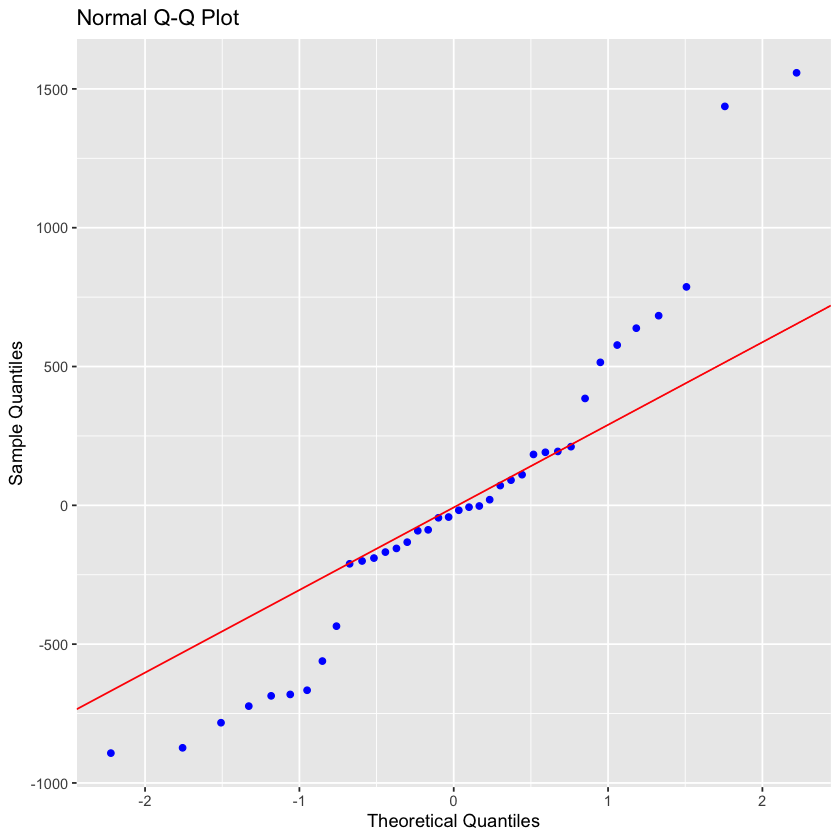

In [3]:
linearModel <- lm(Orders ~ PrintRuns)

summary(linearModel)
ols_plot_resid_qq(linearModel)

Residual Bootstrap

In [4]:
bootstrappedResiduals <- function(x, original_dataset, fit)
{
  lm(newY ~ PrintRuns, data = data.frame(newY = linearModel$fitted.values + linearModel$residuals[x], original_dataset))$coefficients
}  

bootstrappedResidualsReg <- bootstrap(1:38, 100, theta=bootstrappedResiduals, original_dataset, fit)

bootstrappedResidualsReg

beta_0_boot_res_hat <- mean(bootstrappedResidualsReg$thetastar[1,])
beta_1_boot_res_hat <- mean(bootstrappedResidualsReg$thetastar[2,])

$thetastar
                    [,1]        [,2]         [,3]        [,4]        [,5]
(Intercept) -353.5747926 -11.5508893 -513.0848439 -270.055482 -47.9040177
PrintRuns      0.5460339   0.4034215    0.6714731    0.571237   0.4018431
                    [,6]         [,7]         [,8]         [,9]        [,10]
(Intercept) -246.0302337 -273.3548272 -113.0331471 -485.2411987 -385.0291705
PrintRuns      0.5616528    0.5278872    0.4334321    0.6034417    0.5589788
                   [,11]       [,12]       [,13]        [,14]      [,15]
(Intercept) -113.5747678 -127.292875 -10.9840441 -591.5416189 -52.187201
PrintRuns      0.4907179    0.460975   0.3782579    0.6002214   0.491483
                   [,16]        [,17]        [,18]        [,19]        [,20]
(Intercept) -127.2201164 -368.2564590 -678.6204628 -497.7408551 -579.3985030
PrintRuns      0.4263499    0.5476276    0.6517881    0.7604011    0.6633344
                   [,21]        [,22]        [,23]       [,24]    [,25]
(Intercept) -5

Paired BootStrap

In [5]:
bootstrappedPairs <- function(x, original_dataset)
{
  lm(Orders ~ PrintRuns, original_dataset[x, ])$coefficients
}

bootstrappedPairsReg <- bootstrap(1:38, 100, theta=bootstrappedPairs, original_dataset)

bootstrappedPairsReg

beta_0_boot_pairs_hat <- mean(bootstrappedPairsReg$thetastar[1,])
beta_1_boot_pairs_hat <- mean(bootstrappedPairsReg$thetastar[2,])

$thetastar
                    [,1]         [,2]        [,3]        [,4]         [,5]
(Intercept) -117.5758223 -343.2358957 -52.2066918 -30.1627696 -196.7061441
PrintRuns      0.3964271    0.5683947   0.3667794   0.3437115    0.4770722
                    [,6]         [,7]         [,8]         [,9]        [,10]
(Intercept) -258.6307444 -175.6624373 -390.2754642 -169.0789587 -198.9623046
PrintRuns      0.5169671    0.4543175    0.6187624    0.4333095    0.4469034
               [,11]        [,12]       [,13]       [,14]        [,15]
(Intercept) 4.485975 -131.3681868 -75.9495388 -188.427256 -289.2896092
PrintRuns   0.304925    0.4976342   0.3674053    0.506575    0.5505239
                  [,16]        [,17]        [,18]        [,19]       [,20]
(Intercept) -39.2197074 -229.6140805 -215.5975653 -212.6455721 -13.7061450
PrintRuns     0.3622831    0.5117644    0.5139837    0.5032615   0.3296403
                   [,21]      [,22]        [,23]        [,24]        [,25]
(Intercept) -207.988

Original estimators

In [6]:
linearModel$coefficients

(Intercept)    PrintRuns 
-212.6630961    0.4903247

Estimators of beta for Residual Bootstrap

In [7]:
beta_0_boot_res_hat
beta_1_boot_res_hat

[1] -259.3691

[1] 0.5153841

Estimators of beta for Paired Bootstrap

In [8]:
beta_0_boot_pairs_hat
beta_1_boot_pairs_hat

[1] -197.6243

[1] 0.4803382

Histograms \n 
Histograms for Residual Boostrap

In [ ]:
hist(bootstrappedPairsReg$thetastar[1,], main="Bootstrappte Regressionsparameter beta_0, Paired Bootstrap", xlab ="beta_0")
hist(bootstrappedPairsReg$thetastar[2,], main="Bootstrappte Regressionsparameter beta_1, Paired Bootstrap", xlab ="beta_1")

Histograms for Paired Boostrap

In [ ]:
hist(bootstrappedResidualsReg$thetastar[1,], main="Bootstrappte Regressionsparameter beta_0, Residual Bootstrap", xlab ="beta_0")
hist(bootstrappedResidualsReg$thetastar[2,], main="Bootstrappte Regressionsparameter beta_1, Residual Bootstrap", xlab ="beta_1")

Confidence intervals
CI for Residual Bootstrap

In [ ]:
CI(bootstrappedResidualsReg$thetastar[1,], ci=0.95)
CI(bootstrappedResidualsReg$thetastar[2,], ci=0.95)

CI for Paired Bootstrap

In [ ]:
CI(bootstrappedPairsReg$thetastar[1,], ci=0.95)
CI(bootstrappedPairsReg$thetastar[2,], ci=0.95)